# Proyek Analisis Data: Nama dataset
- Nama: Aldi Fauzan
- Email: aldifauzan2047@gmail.com
- Id Dicoding: aldifauzaan

## Menentukan Pertanyaan Bisnis

- Rata-Rata PM2.5 dan PM10 di 5 Stasiun
- Korelasi antara Temperature, Pressure, Dew Point, Precipitation, and Wind Speed
- Perubahan Rata-rata Polutan (SO2, NO2, O3, dan CO) Berdasarkan Bulan dan Tahun

## Menyiapkan semua library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.23.5
1.5.3
0.12.2


## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

path = '/content/drive/MyDrive/PRSA_Dataset/'

file_list = [
    'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    'PRSA_Data_Shunyi_20130301-20170228.csv',
    'PRSA_Data_Tiantan_20130301-20170228.csv',
    'PRSA_Data_Wanliu_20130301-20170228.csv',
    'PRSA_Data_Wanshouxigong_20130301-20170228.csv'
]

df = pd.concat([pd.read_csv(path + file) for file in file_list])
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
2013-03-01 01:00:00,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2013-03-01 02:00:00,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
2013-03-01 03:00:00,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


### Assessing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175320 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       175320 non-null  int64  
 1   year     175320 non-null  int64  
 2   month    175320 non-null  int64  
 3   day      175320 non-null  int64  
 4   hour     175320 non-null  int64  
 5   PM2.5    172024 non-null  float64
 6   PM10     172967 non-null  float64
 7   SO2      171216 non-null  float64
 8   NO2      170695 non-null  float64
 9   CO       167701 non-null  float64
 10  O3       169297 non-null  float64
 11  TEMP     175190 non-null  float64
 12  PRES     175190 non-null  float64
 13  DEWP     175187 non-null  float64
 14  RAIN     175190 non-null  float64
 15  wd       174479 non-null  object 
 16  WSPM     175221 non-null  float64
 17  station  175320 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 25.4+ MB


In [ ]:
print("Column x Rows: ", df.shape)

Column x Rows:  (175320, 18)


In [ ]:
print("Missing Null\n", df.isna().sum())

Missing Null
 No            0
year          0
month         0
day           0
hour          0
PM2.5      3296
PM10       2353
SO2        4104
NO2        4625
CO         7619
O3         6023
TEMP        130
PRES        130
DEWP        133
RAIN        130
wd          841
WSPM         99
station       0
dtype: int64


In [ ]:
print("Duplicated data: ", df.duplicated().sum())

Duplicated data:  0


In [ ]:
Nongzhanguan_data = df[df['station'] == 'Nongzhanguan']
Nongzhanguan_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [ ]:
Shunyi_data = df[df['station'] == 'Shunyi']
Shunyi_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


In [ ]:
Tiantan_data = df[df['station'] == 'Tiantan']
Tiantan_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [ ]:
Wanliu_data = df[df['station'] == 'Wanliu']
Wanliu_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


In [ ]:
Wanshouxigong_data = df[df['station'] == 'Wanshouxigong']
Wanshouxigong_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


### Cleaning Data

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [ ]:
print("Column x Rows: ", df.shape)

Column x Rows:  (159553, 18)


## Exploratory Data Analysis (EDA)

### Explore Data Air Quality

In [ ]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,159553.000000,159553.000000,159553.000000,159553.000000,159553.000000,159553.000000,159553.000000,159553.000000,159553.000000,159553.000000,159553.000000,159553.000000,159553.000000,159553.000000,159553.000000,159553,159553.000000,159553
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Nongzhanguan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18783,NaN,33114
mean,17825.559877,2014.698940,6.487763,15.721290,11.604884,82.477465,107.076451,16.360543,55.249625,1298.235477,54.996423,13.589692,1012.209244,2.600138,0.064972,NaN,1.764979,NaN
std,10057.531591,1.167417,3.449561,8.813914,6.924044,82.556964,92.560266,22.071187,35.281171,1207.821648,56.936054,11.413007,10.354360,13.784785,0.815320,NaN,1.237044,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.100000,-36.000000,0.000000,NaN,0.000000,NaN
25%,9348.000000,2014.000000,3.000000,8.000000,6.000000,22.000000,38.000000,3.000000,28.000000,500.000000,8.000000,3.200000,1003.700000,-8.700000,0.000000,NaN,1.000000,NaN
50%,17932.000000,2015.000000,7.000000,16.000000,12.000000,58.000000,85.000000,8.000000,48.000000,900.000000,41.000000,14.500000,1011.800000,3.200000,0.000000,NaN,1.400000,NaN
75%,26444.000000,2016.000000,9.000000,23.000000,18.000000,114.000000,148.000000,20.000000,76.000000,1600.000000,80.000000,23.300000,1020.500000,15.200000,0.000000,NaN,2.300000,NaN


### Explore Correlation between TEMP, PRES, DEWP, RAIN, and WSPM

In [ ]:
df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

,TEMP,PRES,DEWP,RAIN,WSPM
TEMP,1.000000,-0.829387,0.820889,0.037732,0.037213
PRES,-0.829387,1.000000,-0.770855,-0.063889,0.064573
DEWP,0.820889,-0.770855,1.000000,0.086645,-0.292050
RAIN,0.037732,-0.063889,0.086645,1.000000,0.023872
WSPM,0.037213,0.064573,-0.292050,0.023872,1.000000


### Explore Quantity of CO, SO2, NO2, and O3 by Month

In [ ]:
df_plot = df[['CO', 'SO2', 'NO2', 'O3']].resample('M').mean().round(2)
df_plot['Year Month'] = df_plot.index.strftime('%Y-%m')
df_plot = df_plot.set_index('Year Month')
df_plot.reset_index(inplace=True)
df_plot

,Year Month,CO,SO2,NO2,O3
0,2013-03,1558.29,40.71,70.74,52.79
1,2013-04,981.35,22.03,50.98,56.04
2,2013-05,1080.89,26.79,51.64,78.73
3,2013-06,1551.08,15.04,52.00,73.92
4,2013-07,1049.85,8.32,45.21,80.35
5,2013-08,961.82,8.18,46.31,77.71
6,2013-09,1244.44,11.97,55.95,46.89
7,2013-10,1284.35,16.13,65.76,25.99
8,2013-11,1309.28,19.24,54.46,22.57
9,2013-12,2017.04,38.25,65.08,18.85


In [ ]:
df[['CO', 'NO2', 'SO2', 'O3']].corr()

,CO,NO2,SO2,O3
CO,1.000000,0.692705,0.523943,-0.313773
NO2,0.692705,1.000000,0.495216,-0.504309
SO2,0.523943,0.495216,1.000000,-0.153379
O3,-0.313773,-0.504309,-0.153379,1.000000


### Explore PM2.5 and PM10

In [ ]:
pm25_data = {
    'Nongzhanguan': Nongzhanguan_data['PM2.5'].mean(),
    'Shunyi': Shunyi_data['PM2.5'].mean(),
    'Tiantan': Tiantan_data['PM2.5'].mean(),
    'Wanliu': Wanliu_data['PM2.5'].mean(),
    'Wanshouxigong': Wanshouxigong_data['PM2.5'].mean()
}

pm25_df = pd.DataFrame.from_dict(pm25_data, orient='index', columns=['Avg PM2.5'])
pm25_sorted = pm25_df.sort_values(by='Avg PM2.5', ascending=False)
pm25_sorted

,Avg PM2.5
Wanshouxigong,85.024136
Nongzhanguan,84.838483
Wanliu,83.374716
Tiantan,82.164911
Shunyi,79.491602


In [ ]:
pm10_data = {
    'Nongzhanguan': Nongzhanguan_data['PM10'].mean(),
    'Shunyi': Shunyi_data['PM10'].mean(),
    'Tiantan': Tiantan_data['PM10'].mean(),
    'Wanliu': Wanliu_data['PM10'].mean(),
    'Wanshouxigong': Wanshouxigong_data['PM10'].mean()
}

pm10_df = pd.DataFrame.from_dict(pm10_data, orient='index', columns=['Avg PM10'])
pm10_sorted = pm10_df.sort_values(by='Avg PM10', ascending=False)
pm10_sorted

,Avg PM10
Wanshouxigong,112.223459
Wanliu,110.464618
Nongzhanguan,108.991096
Tiantan,106.363672
Shunyi,98.737026


## Visualization & Explanatory Analysis

### Pertanyaan 1:

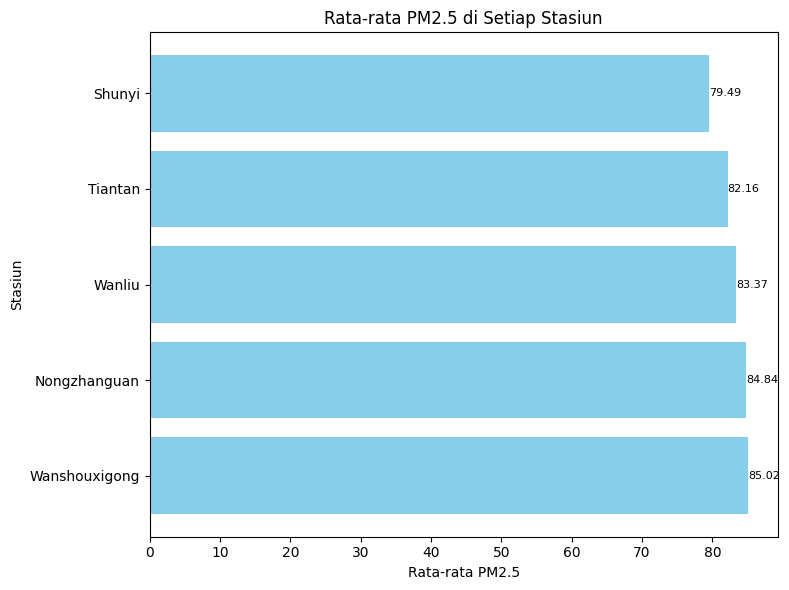

In [ ]:
plt.figure(figsize=(8, 6))
bars = plt.barh(pm25_sorted.index, pm25_sorted['Avg PM2.5'], color='skyblue')

for bar, val in zip(bars, pm25_sorted['Avg PM2.5']):
    plt.text(val, bar.get_y() + bar.get_height() / 2, round(val, 2), ha='left', va='center', color='black', fontsize=8)

plt.title('Rata-rata PM2.5 di Setiap Stasiun')
plt.xlabel('Rata-rata PM2.5')
plt.ylabel('Stasiun')
plt.tight_layout()
plt.show()

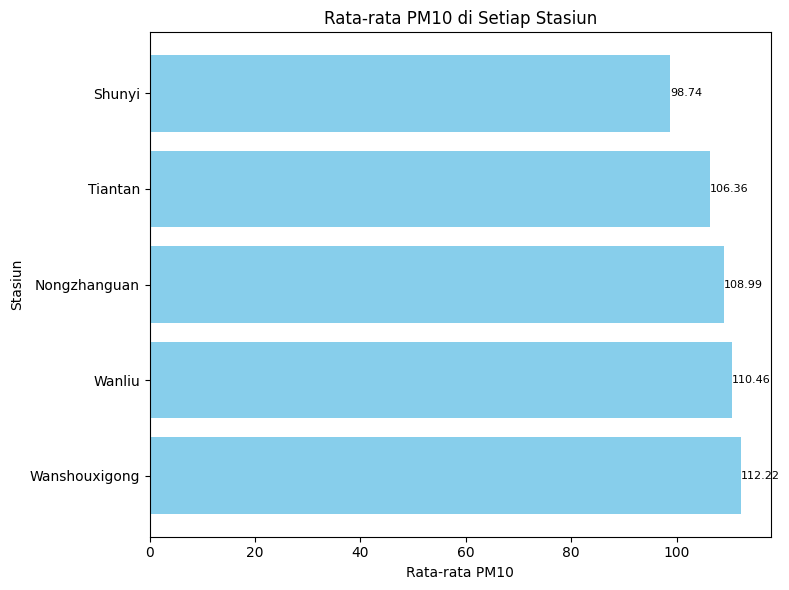

In [ ]:
plt.figure(figsize=(8, 6))
bars = plt.barh(pm10_sorted.index, pm10_sorted['Avg PM10'], color='skyblue')

for bar, val in zip(bars, pm10_sorted['Avg PM10']):
    plt.text(val, bar.get_y() + bar.get_height() / 2, round(val, 2), ha='left', va='center', color='black', fontsize=8)

plt.title('Rata-rata PM10 di Setiap Stasiun')
plt.xlabel('Rata-rata PM10')
plt.ylabel('Stasiun')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

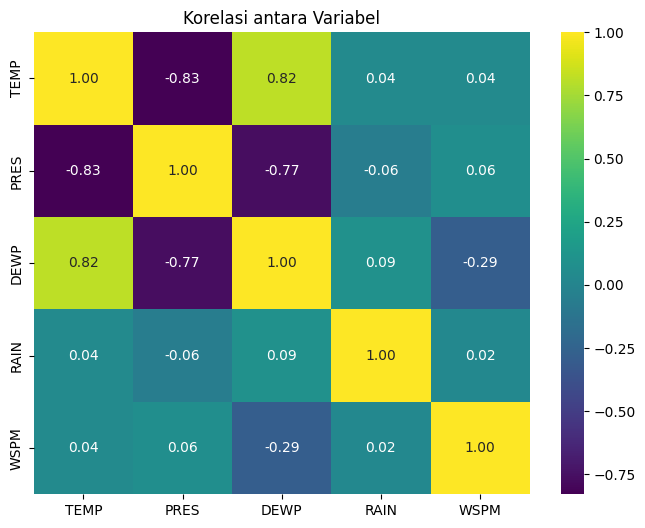

In [ ]:
corr = df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 10})
plt.title('Korelasi antara Variabel')
plt.show()

### Pertanyaan 3:

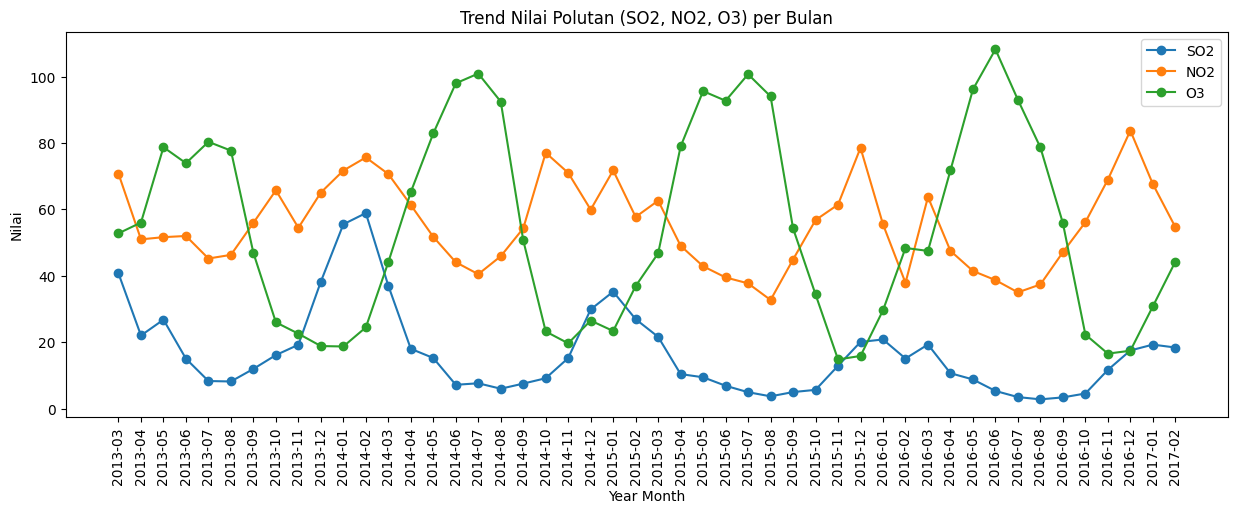

In [ ]:
pollutants = ['SO2', 'NO2', 'O3']

plt.figure(figsize=(15, 5))

for pollutant in pollutants:
    plt.plot(df_plot['Year Month'], df_plot[pollutant], marker='o', label=pollutant)

plt.xlabel("Year Month")
plt.xticks(rotation=90, ha='center')
plt.ylabel("Nilai")
plt.title("Trend Nilai Polutan (SO2, NO2, O3) per Bulan")
plt.legend()
plt.show()

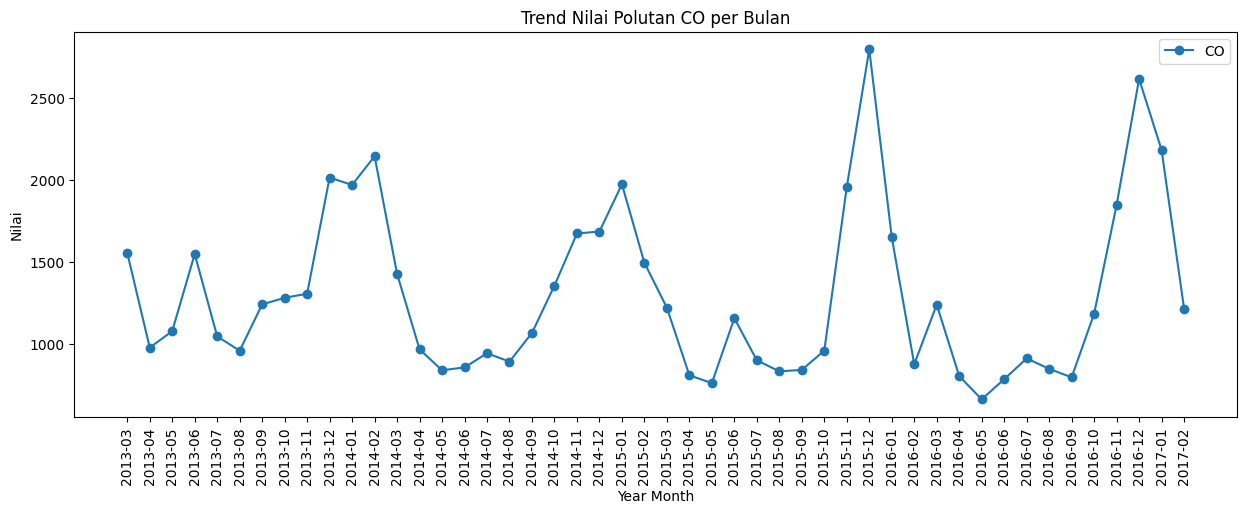

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df_plot['Year Month'], df_plot['CO'], marker='o', label='CO')
plt.xlabel("Year Month")
plt.xticks(rotation=90, ha='center')
plt.ylabel("Nilai")
plt.title("Trend Nilai Polutan CO per Bulan")
plt.legend()
plt.show()

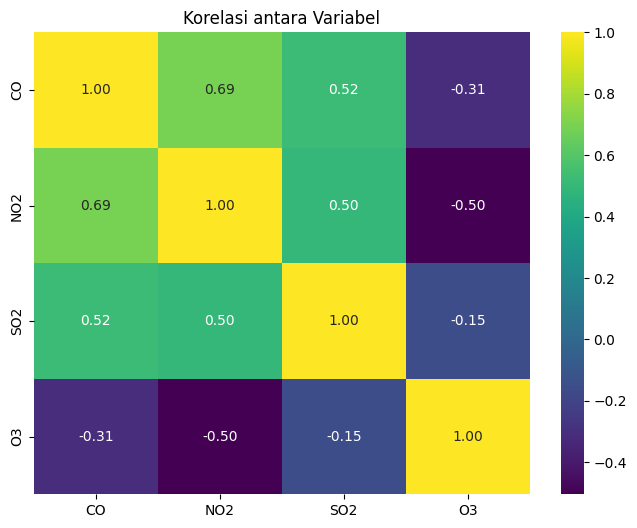

In [ ]:
corr = df[['CO', 'NO2', 'SO2', 'O3']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 10})
plt.title('Korelasi antara Variabel')
plt.show()

## Conclusion

- Pertanyaan 1 : Bagaimana hasil dari Rata-Rata PM2.5 dan PM10 di 5 Stasiun?
> Rata-rata tingkat PM2.5, stasiun Wanshouxigong memiliki nilai tertinggi, diikuti oleh Nongzhanguan dan Wanliu. Sedangkan untuk rata-rata tingkat PM10, stasiun Wanshouxigong juga memiliki nilai tertinggi, diikuti oleh Wanliu dan Nongzhanguan. Ini menunjukkan bahwa stasiun Wanshouxigong cenderung memiliki tingkat polusi udara lebih tinggi dibandingkan dengan stasiun lainnya untuk kedua jenis partikel tersebut.

- Pertanyaan 2 : Korelasi antara Temperature, Pressure, Dew Point, Precipitation, and Wind Speed
> 1. TEMP dan DEWP: Hubungan positif yang kuat (0.82), menunjukkan bahwa ketika suhu naik, titik embun juga cenderung naik.
>
> 2. TEMP dan PRES: Korelasi negatif yang cukup kuat (-0.83), menunjukkan kecenderungan ketika suhu naik, tekanan udara cenderung turun.
>
> 3. DEWP dan PRES: Korelasi negatif kuat (-0.77), menunjukkan ketika titik embun naik, tekanan udara cenderung turun.
>
> 4. DEWP dan WSPM: Korelasi negatif yang moderat (-0.29), menandakan ketika titik embun naik, kecepatan angin cenderung turun.
>
> Namun, korelasi antara RAIN dengan variabel lainnya relatif rendah, menunjukkan bahwa hujan tidak memiliki korelasi yang signifikan dengan variabel lain dalam dataset ini.

- Pertanyaan 3 : Perubahan Rata-rata Polutan (SO2, NO2, O3, dan CO) Berdasarkan Bulan dan Tahun
>1. Polusi di Musim Tertentu: Beberapa polutan mungkin menunjukkan kecenderungan tertentu di musim tertentu.
>
>2. Hubungan Antara Polutan: Beberapa polutan mungkin menunjukkan hubungan yang saling terkait. Misalnya, ada kemungkinan hubungan antara peningkatan CO dan peningkatan NO2 dalam beberapa bulan tertentu.
>
>Hal ini dibuktikan dengan heatmap yang dibuat,
>1. CO dan NO2: Korelasi sebesar 0.69 menunjukkan hubungan positif yang kuat. Kenaikan tingkat CO sering kali diikuti oleh kenaikan tingkat NO2, dan sebaliknya.
>
>2. NO2 dan O3: Korelasi sebesar -0.50 menunjukkan hubungan negatif yang cukup kuat. Peningkatan tingkat NO2 sering kali diikuti oleh penurunan tingkat O3, dan sebaliknya.
>
>3. SO2 dan O3: Korelasi sebesar -0.15 menunjukkan hubungan negatif yang lemah. Hal ini menandakan bahwa kenaikan tingkat SO2 jarang diikuti oleh penurunan tingkat O3, dan sebaliknya.
>
>4. CO dan O3: Korelasi sebesar -0.31 menunjukkan hubungan negatif yang cukup lemah. Peningkatan tingkat CO kadang-kadang diikuti oleh penurunan tingkat O3, dan sebaliknya.

In [ ]:
df.to_csv('all_data.csv')